<a href="https://colab.research.google.com/github/ragingsilverback/Data-Science-and-AI-with-Python/blob/master/Predictive_Models_(_Regression_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

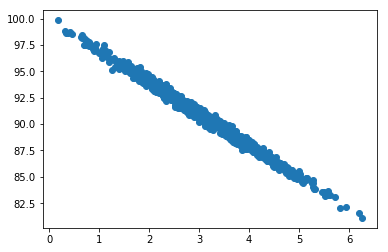

In [14]:
import numpy as np
import matplotlib.pyplot as plt
pageSpeeds = np.random.normal(3.0,1.0,1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0,0.1,1000))*3
plt.scatter(pageSpeeds,purchaseAmount)

Linear regression with r-squared value

In [7]:
from scipy import stats

slope,intercept,r_value,p_value,std_err = stats.linregress(pageSpeeds,purchaseAmount)

r_value ** 2

0.9903258700671224

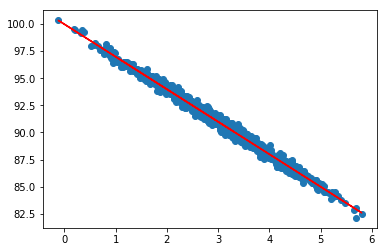

In [9]:
def predict(x):
  return slope*x + intercept

fitline  = predict(pageSpeeds)

plt.scatter(pageSpeeds,purchaseAmount)
plt.plot(pageSpeeds,fitline,c = 'r')
plt.show()

Polynomial Regression

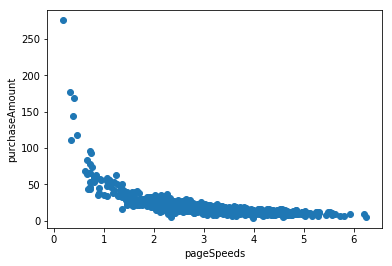

In [18]:
np.random.seed(50)
purchaseAmount1 = np.random.normal(50.0,10.0,1000)/pageSpeeds

plt.xlabel('pageSpeeds')
plt.ylabel('purchaseAmount')
plt.scatter(pageSpeeds,purchaseAmount1)


Fitting a 4th,3rd and 2nd degree polynomial

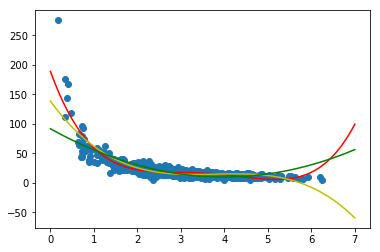

In [23]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount1)

poly4 = np.poly1d(np.polyfit(x,y,4))
poly3 = np.poly1d(np.polyfit(x,y,3))
poly2 = np.poly1d(np.polyfit(x,y,2))

xp = np.linspace(0,7,100)
plt.scatter(x,y)
plt.plot(xp,poly4(xp),c = 'r')
plt.plot(xp,poly3(xp),c = 'y')
plt.plot(xp,poly2(xp),c = 'g')

plt.show()

In [25]:
from sklearn.metrics import r2_score

r2_4  = r2_score(y,poly4(x))
r2_3  = r2_score(y,poly3(x))
r2_2  = r2_score(y,poly2(x))

print(r2_4)
print(r2_3)
print(r2_2)

0.7994758716225931
0.7313514925926705
0.6058086346193214


Multivariate Regression

In [27]:
import pandas as pd
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Scale.fittransform transforms all the data into the range of -1 to 1

In [46]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage','Cylinder','Doors']]
Y = df['Price']

X.head()
# Y.head()

X[['Mileage','Cylinder','Doors']] = scale.fit_transform(X[['Mileage','Cylinder','Doors']].as_matrix())

print(X.head())

est = sm.OLS(Y,X).fit()

est.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


    Mileage  Cylinder     Doors
0 -1.417485   0.52741  0.556279
1 -1.305902   0.52741  0.556279
2 -0.810128   0.52741  0.556279
3 -0.426058   0.52741  0.556279
4  0.000008   0.52741  0.556279


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Sat, 31 Aug 2019   Prob (F-statistic):                    2.23e-11
Time:                        21:02:31   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
Y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64